In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2")

Número de tokens: 16


## Covid

In [32]:
import sys
sys.path.append('../src')
from utils.datasets_splits import load_dataset_splits
import matplotlib.pyplot as plt

In [58]:
def get_answer_distribution(dataset):
    train_ds, val_ds, test_ds = load_dataset_splits(dataset)
    if(dataset=='covid'):
        def get_answer(row):
            ans = row['answers']['text'][0]
            return {"answer": ans}
        test_ds =test_ds.map(get_answer)
        token_counts = [len(tokenizer.encode(ans)) for ans in test_ds['answer']]
        return token_counts
    elif(dataset == 'teleqna'):
        def get_answer(row):
            ans = row['answer']
            full_ans = row[ans]
            return {"new_answer": f"{ans}) {full_ans}"} 
        test_ds =test_ds.map(get_answer)
        token_counts = [len(tokenizer.encode(ans)) for ans in test_ds['new_answer']]
        return token_counts
    elif(dataset == 'boolq'):
        def get_answer(row):
            if(row['answer']):
                return {"answer": 'Yes'}
            else:
                return {"answer": 'No'}
        test_ds =test_ds.map(get_answer)
        token_counts = [len(tokenizer.encode(ans)) for ans in test_ds['answer']]
        return token_counts
    elif(dataset=='clapnq'):
        def get_answer(row):
            ans = row['output'][0]['answer']
            if ans=='':
                return {"answer": 'unanswerable'}
            else:
                return {"answer": ans}
        test_ds =test_ds.map(get_answer)
        token_counts = [len(tokenizer.encode(ans)) for ans in test_ds['answer']]
        return token_counts
    else:
        return []

In [59]:
datasets=['covid','teleqna', 'clapnq', 'boolq']

Loading dataset splits for covid
Train: 1292
Val: 323
Test: 404
Datasets loaded and prepared.


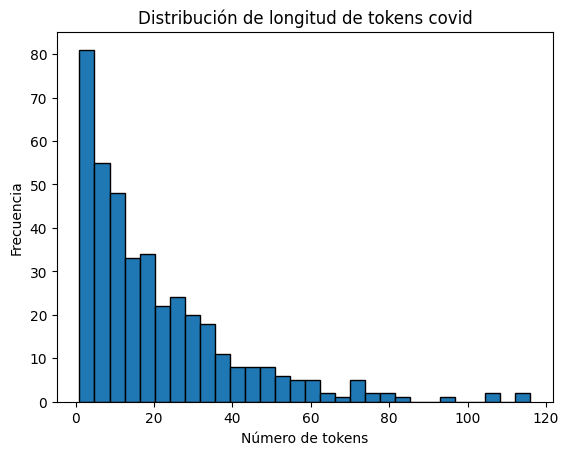

Loading dataset splits for teleqna
Train: 724
Val: 181
Test: 905
Datasets loaded and prepared.


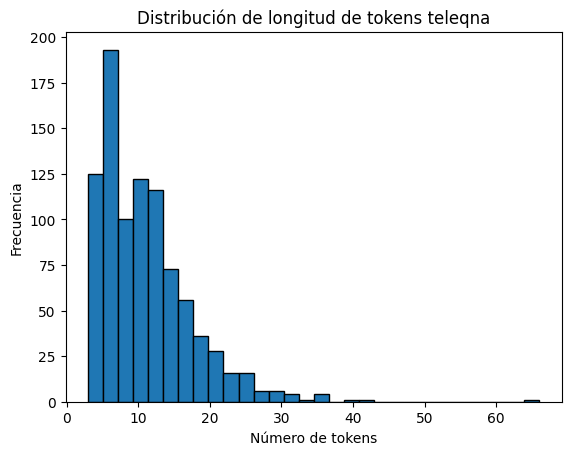

Loading dataset splits for clapnq
Train: 2996
Val: 749
Test: 600
Datasets loaded and prepared.


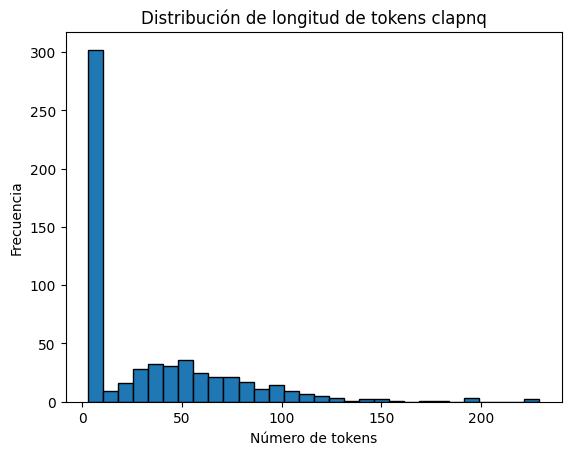

Loading dataset splits for boolq
Loading and preparing datasets...
Train: 7541
Val: 1886
Test: 3270
Datasets loaded and prepared.


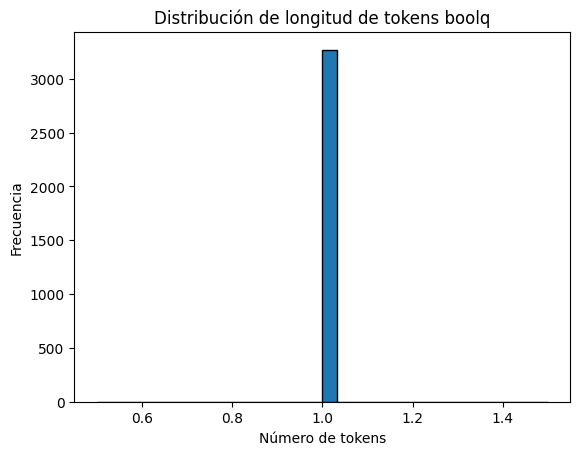

In [61]:
for i in datasets:
    token_counts = get_answer_distribution(i)
    plt.hist(token_counts, bins=30, edgecolor='black')
    plt.title(f"Distribución de longitud de tokens {i}")
    plt.xlabel("Número de tokens")
    plt.ylabel("Frecuencia")
    plt.show()

In [63]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2")
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2")




Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


¿Qué es la fotosíntesis?
Answer: La fotosíntesis es el proceso por el cual las plantas y algunas microorganismas utilizan la luz del sol para producir la energía adecuada para su funcionamiento.



In [ ]:
input_text = "¿Qué es la fotosíntesis?"
inputs = tokenizer(input_text, return_tensors="pt")

output = model.generate(
    **inputs,
    max_new_tokens=120,
    num_beams=5,
    length_penalty=0.5,  # >1.0 penaliza secuencias largas
    early_stopping=True
)

print(tokenizer.decode(output[0], skip_special_tokens=True))

In [1]:
from transformers import pipeline

generator = pipeline("text-generation", model="microsoft/phi-2")

prompt = "Explica brevemente qué es la fotosíntesis."

output = generator(
    prompt,
    max_new_tokens=50,
    num_beams=5,
    early_stopping=True,
    length_penalty=1.2,
    do_sample=False  # Desactiva sampling, activa búsqueda determinista
)

print(output[0]["generated_text"])

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explica brevemente qué es la fotosíntesis. La fotosíntesis es el proceso por el que las plantas crecen y producen energía. La fotosíntesis requiere la luz solar, el agua y el dióxido de


In [2]:
prompt = "¿Qué es la fotosíntesis?"

output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=1.2,
    do_sample=False  # Desactiva sampling, activa búsqueda determinista
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


¿Qué es la fotosíntesis?
Answer: La fotosíntesis es el proceso por el cual las plantas y algunas microorganismas utilizan la luz del sol para producir la energía adecuada para su funcionamiento.

Exercise 2: ¿Cuáles son algunas factores que pueden afectar la fotosíntesis?
Answer: Algunas factores que pueden afectar la fotosíntesis son la temperatura, el nivel de hum


In [3]:
prompt = "¿Qué es la fotosíntesis?"

output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.5,
    do_sample=False  # Desactiva sampling, activa búsqueda determinista
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


¿Qué es la fotosíntesis?
Answer: La fotosíntesis es el proceso por el cual las plantas y algunas microorganismas utilizan la luz del sol para producir la energía adecuada para su funcionamiento.



In [5]:
prompt = "¿Qué es la fotosíntesis?"

output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
    do_sample=False  # Desactiva sampling, activa búsqueda determinista
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


¿Qué es la fotosíntesis?
Answer: La fotosíntesis es el proceso por el cual las plantas y algunas microorganismas utilizan la luz del sol para producir la energía adecuada para su funcionamiento.



In [6]:
prompt = """Instruct:  Using the information in the context, answer the question as concisely and faithfully as possible.If the context does not provide enough information to answer confidently, answer based on the most likely interpretation from the given text.

Context:

Document 0:. As of 26 January 2020, the still ongoing outbreak had resulted in 2066 (618 of them are in Wuhan) confirmed cases and 56 (45 of them were in Wuhan) deaths in mainland China [4] , and sporadic cases exported from Wuhan were reported in Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States, please see the World Health Organization (WHO) news release via https://www.who.int/csr/don/en/ from 14 to 21 January 2020
Document 1:The first three cases detected were reported in France on 24 January 2020 and had onset of symptoms on 17, 19 and 23 January respectively [10] . The first death was reported on 15 February in France. As at 21 February, nine countries had reported cases ( Figure) : Belgium (1), Finland (1), France (12), Germany (16), Italy (3), Russia (2), Spain (2), Sweden (1) and the UK (9 -not included further).
Document 2:. Nonetheless, the virus spread from Wuhan to other cities in China and outside the country. By February 4, 2020, a total of 23 locations outside mainland China reported cases, 22 of which reported imported cases; Spain reported a case caused by secondary transmission (3).
Document 3:066 (618 of them are in Wuhan) confirmed cases and 56 (45 of them were in Wuhan) deaths in mainland China [4] , and sporadic cases exported from Wuhan were reported in Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States, please see the World Health Organization (W
Document 4:As at 09:00 on 21 February, few COVID-19 cases had been detected in Europe compared with Asia. However the situation is rapidly developing, with a large outbreak recently identified in northern Italy, with transmission in several municipalities and at least two deaths [18] . As at 5 March 2020, there are 4,250 cases including 113 deaths reported among 38 countries in the WHO European region [19] .

Question:
As of 26 January 2020, what countries had sporadic cases?

Output:"""

output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
    do_sample=False  # Desactiva sampling, activa búsqueda determinista
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Instruct:  Using the information in the context, answer the question as concisely and faithfully as possible.If the context does not provide enough information to answer confidently, answer based on the most likely interpretation from the given text.

Context:

Document 0:. As of 26 January 2020, the still ongoing outbreak had resulted in 2066 (618 of them are in Wuhan) confirmed cases and 56 (45 of them were in Wuhan) deaths in mainland China [4] , and sporadic cases exported from Wuhan were reported in Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States, please see the World Health Organization (WHO) news release via https://www.who.int/csr/don/en/ from 14 to 21 January 2020
Document 1:The first three cases detected were reported in France on 24 January 2020 and had onset of symptoms on 17, 19 and 23 January respectively [10] . The first death was reported on 15 February in France. As at 21 February, nine countries had reported cases ( Figure) : Be

In [7]:
output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
    do_sample=False,  # Desactiva sampling, activa búsqueda determinista
    return_full_text=False 
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



As of 26 January 2020, Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States had sporadic cases.



In [8]:
output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=2,
    do_sample=False,  # Desactiva sampling, activa búsqueda determinista
    return_full_text=False 
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



The countries that had sporadic cases as of 26 January 2020 were Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States.



In [11]:
output = generator(
    prompt,
    do_sample=False,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=120,
)
print(output[0]["generated_text"])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Australia, Canada, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Netherlands, Norway, Portugal, Romania, Russia, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom, United States.


First, we need to identify the countries that have sporadic cases according to Document 2. These include Belgium, Finland, France, Germany, Italy, Russia, Spain, Sweden, and the UK.

Next, we need to check if these countries also report cases in Document 3. According to Document 3


In [12]:
output = generator(
    prompt,
    do_sample=False,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
)
print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



The countries that had sporadic cases as of 26 January 2020 were Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States.



In [16]:
output = generator(
    prompt,
    do_sample=False,
    #repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=2,
)
print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



The countries that had sporadic cases as of 26 January 2020 were Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States.



In [17]:
output = generator(
    prompt,
    do_sample=False,
    #repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
)
print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



As of 26 January 2020, Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States had sporadic cases.



In [15]:
output = generator(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
    do_sample=False,  # Desactiva sampling, activa búsqueda determinista
    return_full_text=False 
)

print(output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



As of 26 January 2020, Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and the United States had sporadic cases.



In [ ]:
#were reported in Thailand, Japan, Republic of Korea, Hong Kong, Taiwan, Australia, and

In [ ]:
## my model

In [33]:
from transformers import AutoModelForCausalLM, AutoTokenizer, set_seed
from peft import PeftModel, PeftConfig
def load_model_auto(device="cuda", model_name=None, lora_adapter_path=None):
    if lora_adapter_path:
        print(f"Loading base model from LoRA adapter: {lora_adapter_path}")
        config = PeftConfig.from_pretrained(lora_adapter_path)
        model = AutoModelForCausalLM.from_pretrained(
            config.base_model_name_or_path,
            torch_dtype="auto",
            trust_remote_code=True,
        ).to(device)
        model = PeftModel.from_pretrained(model, lora_adapter_path).to(device)

        tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path, trust_remote_code=True, padding_side="left")
    elif model_name:
        print(f"Loading base model: {model_name}")
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype="auto",
            trust_remote_code=True,
        ).to(device)
        tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, padding_side="left")
    else:
        raise ValueError("You must provide either a model_name or a lora_adapter_path.")

    # tokenizer.pad_token = tokenizer.eos_token
    # if tokenizer.pad_token_id is None:
    #     tokenizer.pad_token_id = tokenizer.eos_token_id

    return model, tokenizer

In [34]:
model, tokenizer = load_model_auto('cuda', None, "../models/covid/adapters/best_phi_2_rag_covid_k3_5e_10bs")


Loading base model from LoRA adapter: ../models/covid/adapters/best_phi_2_rag_covid_k3_5e_10bs


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [35]:
generator2 = pipeline("text-generation", model=model, tokenizer=tokenizer)

output = generator2(
    prompt,
    max_new_tokens=80,
    num_beams=5,
    early_stopping=True,
    length_penalty=2,
    do_sample=True,  # Desactiva sampling, activa búsqueda determinista
    return_full_text=False 
)

print(output[0]["generated_text"])


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeo

KeyboardInterrupt: 

In [ ]:
generator2 = pipeline("text-generation", model=model, tokenizer=tokenizer)

output = generator2(
    prompt,
    max_new_tokens=120,
    num_beams=5,
    early_stopping=True,
    length_penalty=0.1,
    do_sample=False,  # Desactiva sampling, activa búsqueda determinista
    return_full_text=False 
)

print(output[0]["generated_text"])